In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pickle
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

In [2]:
path_string = '../results/AdaptivePara.seqs'
with open(path_string,'rb') as f:
    data = pickle.load(f)

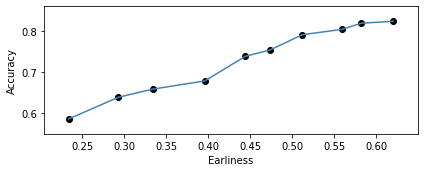

In [34]:
plt.figure(figsize=(6,2.5))
plt.scatter(data[0],data[1],c='black') 
plt.plot(data[0], data[1],c='steelblue')
 
plt.xlabel('Earliness')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show
#plt.savefig('alpha.jpg',dpi=300)

In [27]:
path_string = '../results/LossUncertainty.seqs'
with open(path_string,'rb') as f:
    result = pickle.load(f)
x=[x for x in range(30)]
func3 = interpolate.interp1d(x, result[0], kind='quadratic')
func4 = interpolate.interp1d(x, result[1], kind='quadratic')
x2=np.arange(0,29,0.1)
y2=func3(x2)
u2=func4(x2)

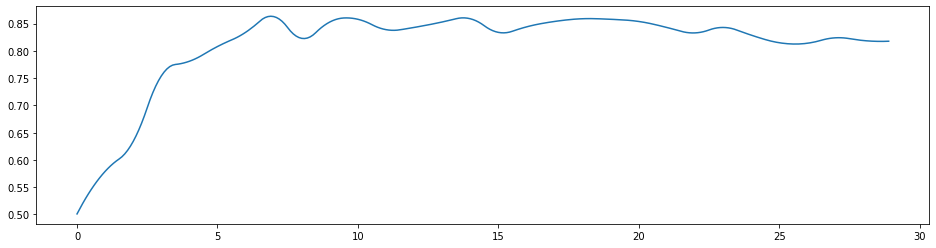

In [29]:
plt.figure(figsize=(16,4))
plt.plot(x2, y2)
plt.show()

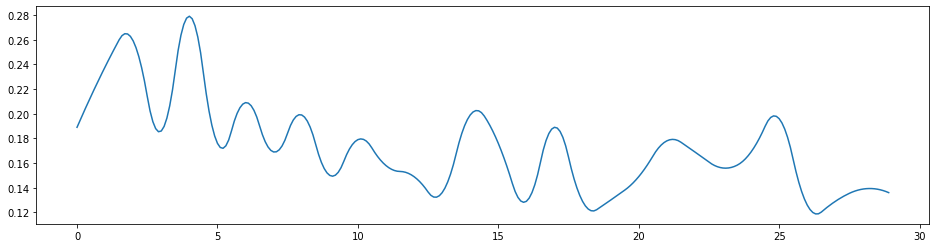

In [30]:
plt.figure(figsize=(16,4))
plt.plot(x2, u2)
plt.show()

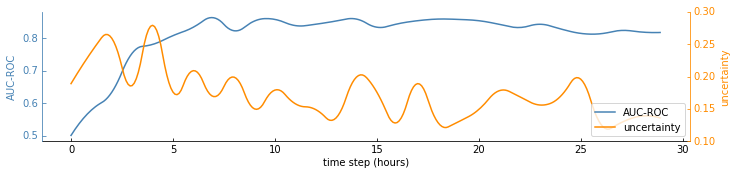

In [31]:
plt.figure(figsize=(10,2))
fig = plt.figure(1) 
ax_cof = HostAxes(fig, [0, 0, 0.9, 0.9])  

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
#append axes
ax_cof.parasites.append(ax_temp)
#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('AUC-ROC')
ax_cof.set_xlabel('time step (hours)')
ax_temp.set_ylabel('uncertainty')
fig.add_axes(ax_cof)

''' #set limit of x, y
ax_cof.set_xlim(0,2)
ax_cof.set_ylim(0,3)
'''
curve_cof = ax_cof.plot(x2, y2, label="AUC-ROC", color='steelblue')
curve_temp = ax_temp.plot(x2, u2, label="uncertainty", color='darkorange')

ax_temp.set_ylim(0.1,0.3)
ax_cof.legend()

ax_cof.axis['left'].label.set_color('steelblue')
ax_temp.axis['right'].label.set_color('darkorange')

ax_cof.axis['left'].major_ticks.set_color('steelblue')
ax_temp.axis['right'].major_ticks.set_color('darkorange')

ax_cof.axis['left'].major_ticklabels.set_color('steelblue')
ax_temp.axis['right'].major_ticklabels.set_color('darkorange')

ax_cof.axis['left'].line.set_color('steelblue')
ax_temp.axis['right'].line.set_color('darkorange')

plt.show()